## Recommender System Model

## Menginisiasi library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras

## Bagian preprocessing data

In [2]:
# Load item dataset
item_data = pd.read_csv('./data/article.csv')
item_count = len(item_data.index)

print(item_data.head())
#check item_data data type and shape
print(item_data.dtypes)
print(item_data.shape)
print(item_count)

                                            title  sports  cooking  books  \
0                     How to Train for a Marathon    0.80     0.05   0.05   
1              The Best Recipes for a Cozy Winter    0.05     0.80   0.05   
2                        The Top 10 Books of 2023    0.05     0.05   0.80   
3  The Oscars 2023: Predictions and Controversies    0.05     0.05   0.05   
4  The Rise of Indie Games in the Gaming Industry    0.05     0.05   0.05   

   cinema  gaming  
0    0.05    0.05  
1    0.05    0.05  
2    0.05    0.05  
3    0.80    0.05  
4    0.05    0.80  
title       object
sports     float64
cooking    float64
books      float64
cinema     float64
gaming     float64
dtype: object
(49, 6)
49


In [3]:
#create user_data dummy dataset
rng = np.random.default_rng(seed=42)
user_data = pd.DataFrame(rng.random((49,5)), columns=['sports', 'cooking', 'books', 'cinema', 'gaming'])
print(user_data.head())
#check user_data data type and shape
#shape must be (__, 5)
print(user_data.dtypes)
print(user_data.shape)


     sports   cooking     books    cinema    gaming
0  0.773956  0.438878  0.858598  0.697368  0.094177
1  0.975622  0.761140  0.786064  0.128114  0.450386
2  0.370798  0.926765  0.643865  0.822762  0.443414
3  0.227239  0.554585  0.063817  0.827631  0.631664
4  0.758088  0.354526  0.970698  0.893121  0.778383
sports     float64
cooking    float64
books      float64
cinema     float64
gaming     float64
dtype: object
(49, 5)


In [4]:
#create a dataframe consist of only titles
#for testing purposes
item_data_popped = item_data.pop('title')

In [5]:
#convert item features to numpy array
item_features = item_data[['sports', 'cooking', 'books', 'cinema', 'gaming']].values.astype(np.float32)
print(item_features[:5])
print(item_features.shape)

[[0.8  0.05 0.05 0.05 0.05]
 [0.05 0.8  0.05 0.05 0.05]
 [0.05 0.05 0.8  0.05 0.05]
 [0.05 0.05 0.05 0.8  0.05]
 [0.05 0.05 0.05 0.05 0.8 ]]
(49, 5)


In [6]:
#convert user features to numpy array
user_features = user_data[['sports', 'cooking', 'books', 'cinema', 'gaming']].values.astype(np.float32)
print(user_features[:5])
print(user_features.shape)

[[0.77395606 0.43887845 0.85859793 0.697368   0.09417735]
 [0.97562236 0.7611397  0.7860643  0.12811363 0.45038593]
 [0.37079802 0.92676497 0.6438651  0.8227616  0.4434142 ]
 [0.22723871 0.5545848  0.06381726 0.8276312  0.6316644 ]
 [0.75808775 0.35452595 0.970698   0.8931211  0.7783835 ]]
(49, 5)


In [7]:
#calculate dot product
dot_product = np.dot(user_features, item_features.T)
print(dot_product[:5])
print(dot_product.shape)

[[0.723616   0.4723077  0.7870974  0.66617495 0.21378191 0.71109414
  0.5062182  0.7618793  0.6570799  0.2821625  0.4723077  0.66617495
  0.7870974  0.2821625  0.74555993 0.82196575 0.70910484 0.5152377
  0.78523386 0.7499099  0.723616   0.4723077  0.7870974  0.70910484
  0.2821625  0.74555993 0.5110056  0.8477391  0.78387314 0.723616
  0.4723077  0.7870974  0.70910484 0.2821625  0.74555993 0.5110056
  0.8477391  0.723616   0.4723077  0.7870974  0.70910484 0.2821625
  0.74555993 0.5110056  0.723616   0.4723077  0.7870974  0.70910484
  0.28216246]
 [0.8867831  0.72592115 0.7446146  0.25115153 0.49285576 0.8665811
  0.695516   0.75284624 0.32517824 0.49352604 0.72592115 0.25115153
  0.7446146  0.49352604 0.92484015 0.75102025 0.29045475 0.76522434
  1.1276805  0.62090635 0.8867831  0.72592115 0.7446146  0.29045475
  0.49352604 0.92484015 0.77470225 0.83145267 0.44485074 0.8867831
  0.72592115 0.7446146  0.29045475 0.49352604 0.92484015 0.77470225
  0.83145267 0.8867831  0.72592115 0.7446

## Mendefinisikan dan melakukan training pada model

In [8]:
#Defining callback to prevent overfitting
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    '''
    Memberhentikan training setelah mencapai 94% accuracy

    Args:
      epoch (integer) - index of epoch (required but unused in the function definition below)
      logs (dict) - metric results from the training epoch
    '''
    # Check accuracy
    if(logs.get('loss') < 0.06):
      # Stop if threshold is met
      print("\nLoss is lower than 0.06 so stopping training!")
      self.model.stop_training = True
# Instantiate class
callbacks = myCallback()

In [9]:
# Define the TensorFlow model
input_shape = (5,)
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, input_shape=input_shape, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(item_count, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x0000023E0417FB50>>

In [10]:
history_train = model.fit(user_features, np.argmax(dot_product, axis=1), epochs=1500, batch_size=32, callbacks=[callbacks])

Epoch 1/1500
2/2 [==============================] - 1s 4ms/step - loss: 3.9114 - accuracy: 0.0612
Epoch 2/1500
2/2 [==============================] - 0s 5ms/step - loss: 3.8878 - accuracy: 0.0816
Epoch 3/1500
2/2 [==============================] - 0s 3ms/step - loss: 3.8646 - accuracy: 0.1020
Epoch 4/1500
2/2 [==============================] - 0s 4ms/step - loss: 3.8422 - accuracy: 0.1224
Epoch 5/1500
2/2 [==============================] - 0s 6ms/step - loss: 3.8188 - accuracy: 0.1429
Epoch 6/1500
2/2 [==============================] - 0s 5ms/step - loss: 3.7964 - accuracy: 0.1429
Epoch 7/1500
2/2 [==============================] - 0s 5ms/step - loss: 3.7727 - accuracy: 0.1429
Epoch 8/1500
2/2 [==============================] - 0s 6ms/step - loss: 3.7496 - accuracy: 0.1633
Epoch 9/1500
2/2 [==============================] - 0s 5ms/step - loss: 3.7257 - accuracy: 0.1633
Epoch 10/1500
2/2 [==============================] - 0s 5ms/step - loss: 3.7018 - accuracy: 0.1633
Epoch 11/1500
2/2 [

In [11]:
import matplotlib.pyplot as plt
history_dict = history_train.history
history_dict.keys()

dict_keys(['loss', 'accuracy'])

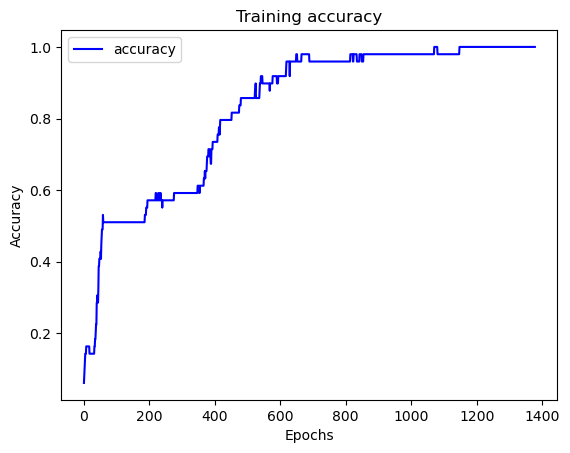

In [14]:
#evaluation metrics
acc = history_train.history['accuracy']
loss = history_train.history['loss']

epochs = range(1, len(acc) + 1)

#plot Training Loss and Accuracy
# "bo" is for "blue dot"
#plt.plot(epochs, loss, 'bo', label='loss')
# b is for "solid blue line"
plt.plot(epochs, acc, 'b', label='accuracy')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## Melakukan prediksi rekomendasi terhadap user

In [15]:
# Predict item ratings using the trained model
custom_user_features = np.array([[0.05, 0.05, 0.05, 0.8, 0.05]])
predicted_dot_product = model.predict(custom_user_features)
#extract 5 most relevant content for the user
top_item_indices = np.argsort(predicted_dot_product, axis=1)[0,::-1][:5]
recommended_item_features = item_features[top_item_indices]

1/1 [==============================] - 0s 166ms/step


In [16]:
print(predicted_dot_product)
print(top_item_indices)
print(recommended_item_features)

[[7.42505293e-08 7.68250814e-08 1.12777997e-07 4.37582521e-08
  1.43529437e-08 5.00977464e-08 2.07392887e-07 1.59663742e-07
  5.19412175e-08 3.42764856e-08 2.27344458e-07 4.66584886e-08
  8.45664072e-09 4.59665799e-08 1.03728247e-07 1.41638008e-08
  5.12524352e-08 7.41215306e-04 2.89425839e-06 3.76568394e-08
  1.02855878e-07 7.13628765e-08 1.78493906e-07 4.67326764e-08
  8.66536567e-08 5.07308400e-08 1.05414051e-06 5.64080437e-07
  9.99250829e-01 1.15972206e-07 9.64122577e-08 5.53014772e-08
  9.82487762e-08 1.20657067e-08 3.52715759e-08 1.03133260e-07
  1.86057534e-08 5.44660210e-08 1.96045331e-08 5.31587716e-08
  7.51337978e-08 1.38456301e-07 1.49007874e-07 1.57985109e-08
  5.30239888e-08 1.81100006e-07 2.08095031e-07 1.95021581e-08
  7.64397825e-08]]
[28 17 18 26 27]
[[0.1  0.1  0.1  0.8  0.2 ]
 [0.05 0.8  0.1  0.05 0.05]
 [0.7  0.05 0.1  0.1  0.7 ]
 [0.1  0.8  0.05 0.05 0.05]
 [0.1  0.1  0.8  0.05 0.05]]


In [17]:
#print recommendations
for column in top_item_indices:
    item_title = item_data_popped.iloc[[column]]
    print(item_title)

28    Marvel vs DC: Which Cinematic Universe is Better?
Name: title, dtype: object
17    The Secrets of Mastering the Art of Cooking
Name: title, dtype: object
18    The Best Sports Games for Mobile Devices in 2023
Name: title, dtype: object
26    The Ultimate Guide to Healthy Cooking
Name: title, dtype: object
27    How to Write a Bestselling Novel in 2023
Name: title, dtype: object


In [18]:
#save the model
saved_model_path = "./recsys_model.h5"
model.save(saved_model_path)

## Mengubah format .h5 ke JSON

In [19]:
#install tfjs
%pip install tensorflowjs

Note: you may need to restart the kernel to use updated packages.


In [20]:
#convert .h5 to .json
!tensorflowjs_converter --input_format=keras {saved_model_path} ./

2023-06-08 16:31:08.392111: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2023-06-08 16:31:08.392474: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
